In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'C:\Users\paras\Downloads\VideoGamesProject-main\VideoGamesProject-main\VideoGamesSales.csv')
#df=df[df.duplicated()]
df=df.drop_duplicates()
df['Region'] = df['Region'].fillna('North')
df['NA_Sales'] = df['NA_Sales'].replace('[$]','',regex=True)
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'],errors='coerce')
Average_Sales=df['NA_Sales'].mean()
Average_Sales=int(Average_Sales)
Average_Sales
df['NA_Sales']=df['NA_Sales'].fillna(Average_Sales)
df['Country']=df['Country'].replace({'USA':'United States'})
df['Country']=df['Country'].str.title()
df=df.rename(columns={'NA_Sales':'National Sales', ' Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'})
sales_cap = df['National Sales'].quantile(0.95)
df['National Sales'] = np.where(df['National Sales'] > sales_cap,sales_cap,df['Global_Sales'])
df
 

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global_Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,2.07,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,2.07,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,2.07,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,2.07,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,2.07,31.37,3.381,9.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,5890,Crazy Taxi: Catch a Ride,GBA,2017,Sep,Racing,THQ,Australia,Sydney,New South Wales,West,0.30,0.30,0.063,0.090
5905,5891,MySims Party,DS,2017,Oct,Simulation,Electronic Arts,Australia,Sydney,New South Wales,West,0.30,0.30,0.045,0.090
5906,5892,Harry Potter and the Order of the Phoenix,X360,2017,Nov,Action,Electronic Arts,Australia,Sydney,New South Wales,West,0.30,0.30,0.072,0.090
5907,5893,Skylanders: SuperChargers,PS4,2017,Dec,Action,Activision,Australia,Sydney,New South Wales,West,0.30,0.30,0.051,0.090


In [28]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


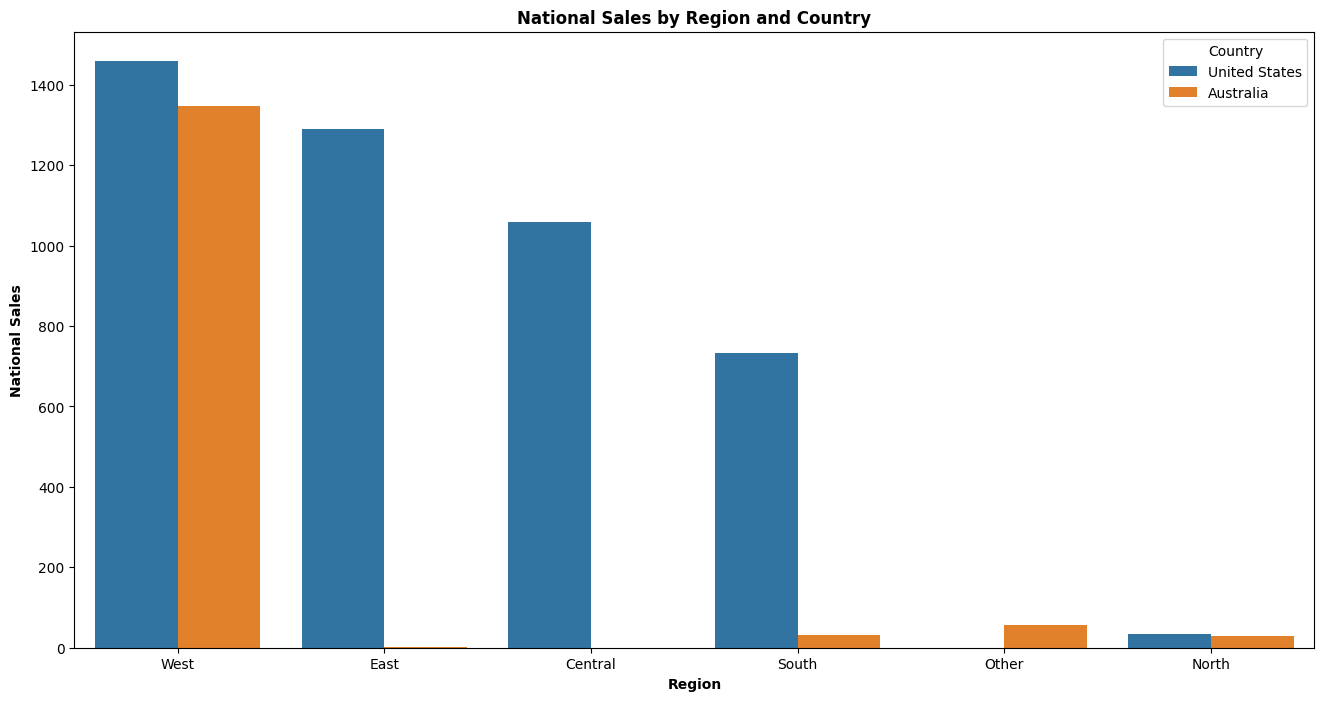

In [42]:
#create a bar chart
National_Sales=df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales',ascending=False)
National_Sales
plt.figure(figsize=(16,8))
sns.barplot(data=National_Sales, x='Region', y='National Sales',hue='Country')
plt.title('National Sales by Region and Country',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()



<Axes: xlabel='Country', ylabel='National Sales'>

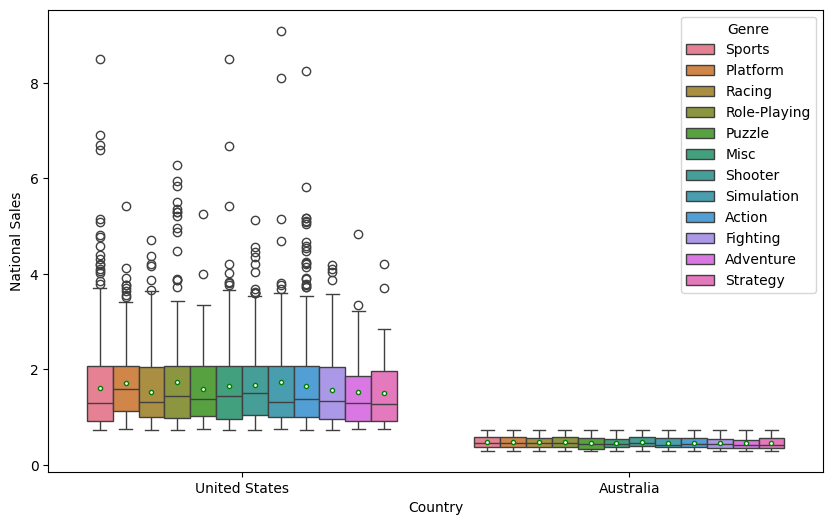

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Country',y='National Sales',data=df,showmeans=True ,hue='Genre',meanprops={"marker":"o","markerfacecolor":"white","markersize": 3 
                                                                                          ,"markeredgecolor":"green"})

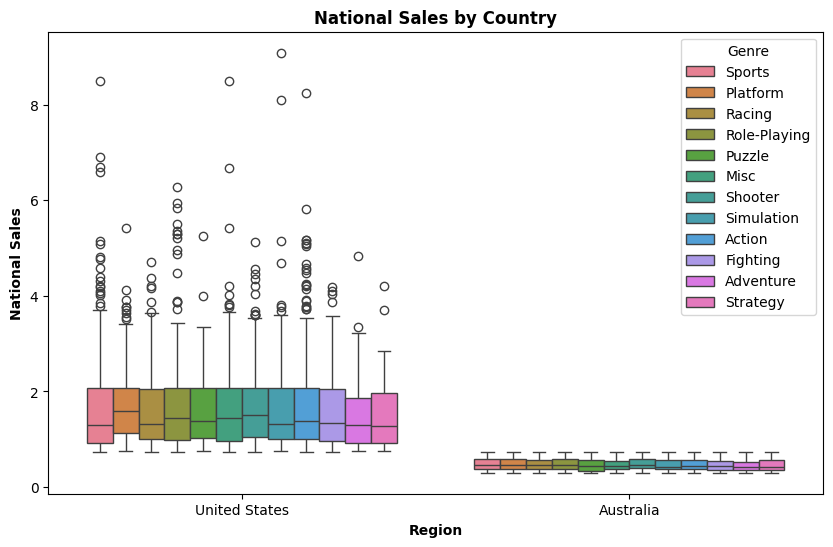

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Country',y='National Sales',data=df,hue='Genre')
plt.title('National Sales by Country',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

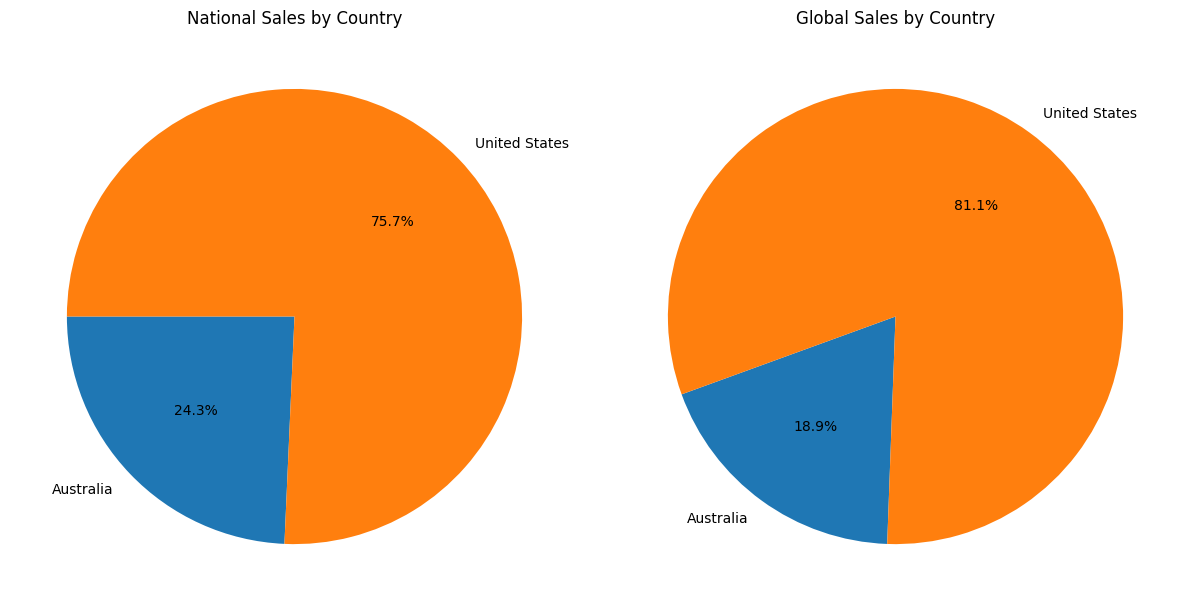

In [64]:
#create a pie chart
import matplotlib.pyplot as plt

Sales = df.groupby(['Country'])[['National Sales', 'Global_Sales']].sum().reset_index()

Country = Sales['Country']
National_Sales = Sales['National Sales']
Global_Sales = Sales['Global_Sales']

fig, axs = plt.subplots(1, 2, figsize=(12,7))

axs[0].pie(National_Sales, labels=Country, autopct='%1.1f%%', startangle=180)
axs[0].set_title('National Sales by Country')

axs[1].pie(Global_Sales, labels=Country, autopct='%1.1f%%', startangle=200)
axs[1].set_title('Global Sales by Country')

plt.tight_layout()
plt.show()

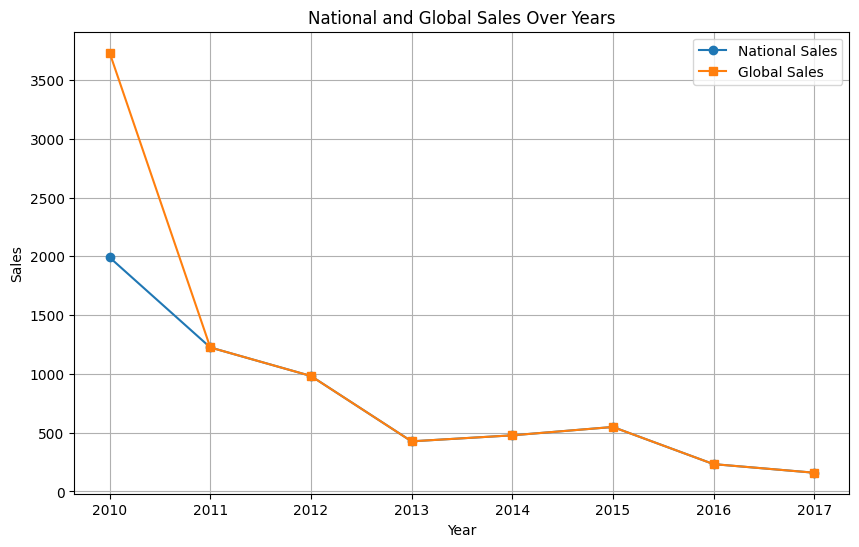

In [70]:
#Create a line chart
yearly_sales = df.groupby('Year')[['National Sales', 'Global_Sales']].sum().reset_index()

plt.figure(figsize=(10,6))

plt.plot(yearly_sales['Year'], yearly_sales['National Sales'],
         marker='o', linestyle='-', label='National Sales')

plt.plot(yearly_sales['Year'], yearly_sales['Global_Sales'],
         marker='s', linestyle='-', label='Global Sales')

plt.title('National and Global Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

plt.show()